Wind Power Generation Forecasting


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Here we are loading CSV file.
location1 = pd.read_csv('Location1.csv')
location2 = pd.read_csv('Location2.csv')
location3 = pd.read_csv('Location3.csv')
location4 = pd.read_csv('Location4.csv')

In [3]:
location1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [4]:
location1['Location'] = 'Location1'
location2['Location'] = 'Location2'
location3['Location'] = 'Location3'
location4['Location'] = 'Location4'

merged_data = pd.concat([location1, location2, location3, location4], ignore_index = True)
merged_data.head()


,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,Location1
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,Location1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,Location1
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,Location1
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,Location1


In [5]:
merged_data.to_csv('merged_locations.csv', index = False)

In [6]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [7]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m,175200.0,46.655994,22.012738,-31.2,30.2000,46.9000,65.3000,101.7000
relativehumidity_2m,175200.0,70.155291,17.326678,9.0,57.0000,72.0000,84.0000,100.0000
dewpoint_2m,175200.0,36.516241,20.933153,-36.2,21.9000,36.2000,54.6000,78.7000
windspeed_10m,175200.0,4.157639,2.012682,0.0,2.6300,3.8500,5.3800,18.5300
windspeed_100m,175200.0,6.879334,3.043964,0.0,4.7000,6.6800,8.8000,24.5900
winddirection_10m,175200.0,201.589446,99.639040,1.0,130.0000,211.0000,288.0000,360.0000
winddirection_100m,175200.0,201.539070,100.683777,0.0,129.0000,211.0000,290.0000,360.0000
windgusts_10m,175200.0,8.038205,3.617488,0.5,5.3000,7.6000,10.3000,29.2000
Power,175200.0,0.303429,0.257325,0.0,0.0877,0.2331,0.4742,0.9994


In [8]:
#for missing value

merged_data.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
dtype: int64

In [9]:
# duplicated values
merged_data.duplicated().sum()

0

In [10]:
#Encode the categorical variables 
merged_data = pd.get_dummies(merged_data, columns = ['Location'], drop_first= True)
merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,0,0,0
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,0,0,0
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,0,0,0
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,0,0,0
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,0,0,0


In [11]:
merged_data.drop('Time', axis=1, inplace=True)

In [12]:
merged_data.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,0,0,0
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,0,0,0
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,0,0,0
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,0,0,0
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,0,0,0


Week 2: EDA

In [13]:
numerical_columns = merged_data.select_dtypes(include=['number']).columns
numerical_columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power', 'Location_Location2', 'Location_Location3',
       'Location_Location4'],
      dtype='object')

IndexError: index 9 is out of bounds for axis 0 with size 9

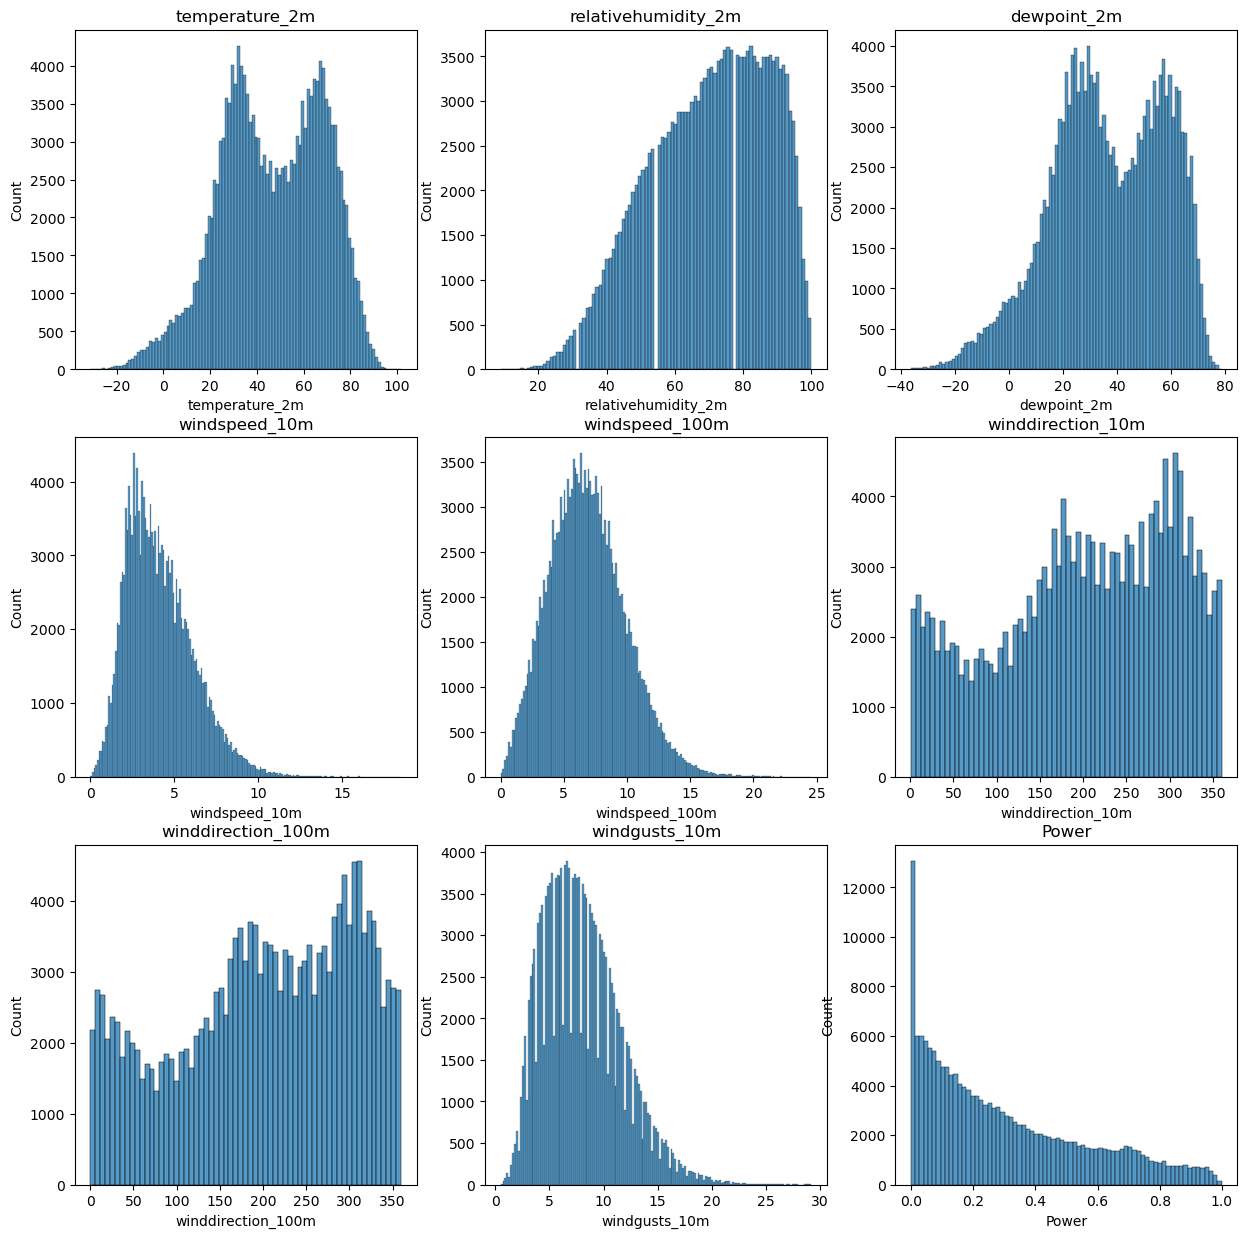

In [14]:
fig, axes = plt.subplots(3,3, figsize=(15,15))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.histplot(merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


IndexError: index 9 is out of bounds for axis 0 with size 9

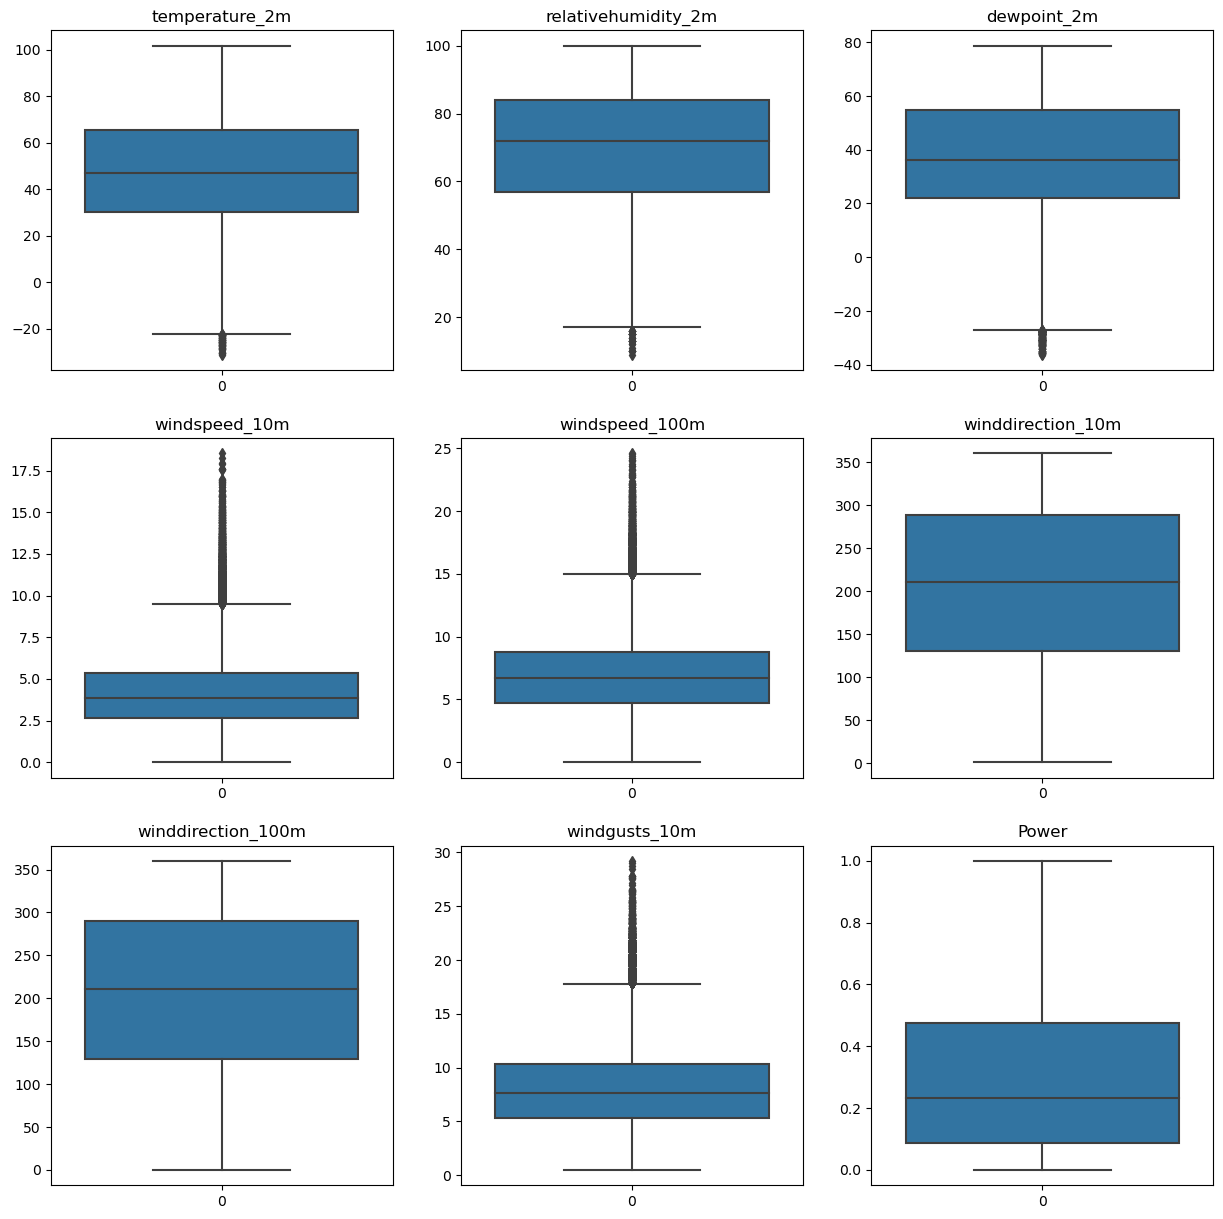

In [15]:
fig, axes = plt.subplots(3,3, figsize= (15,15))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

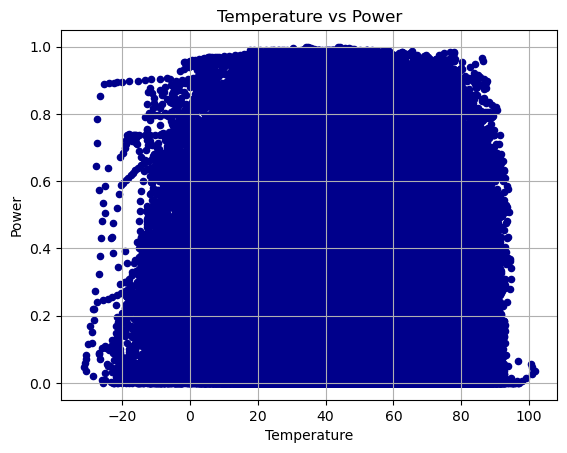

In [17]:
merged_data.plot.scatter(x='temperature_2m', y='Power', c='DarkBlue')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs Power')
plt.grid(True)

IndexError: index 8 is out of bounds for axis 0 with size 8

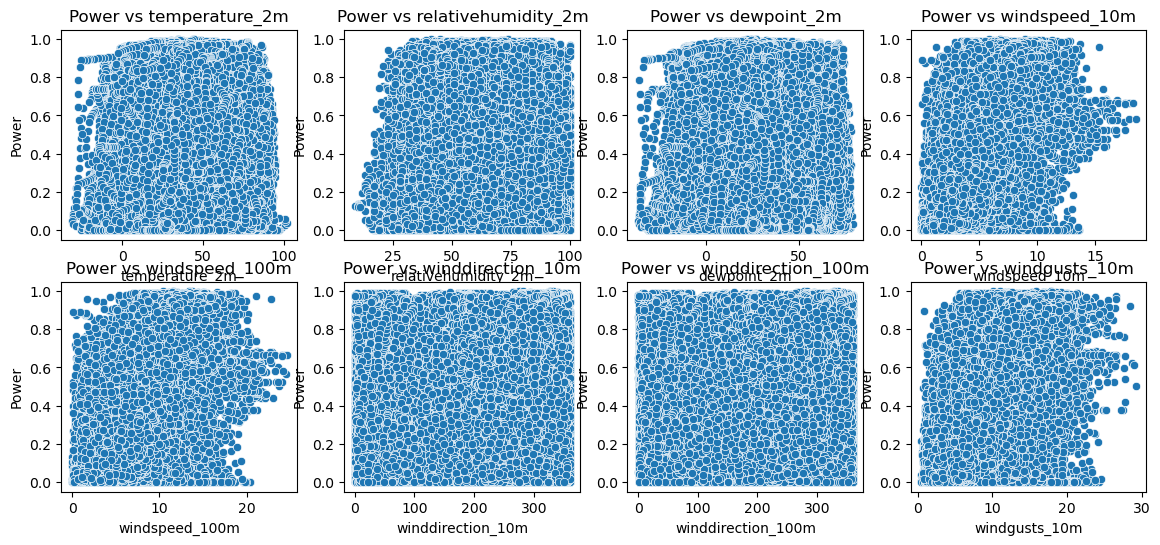

In [18]:
fig, axes = plt.subplots(2,4, figsize=(14, 6))
axes = axes.flatten()
for i , col in enumerate(numerical_columns.drop('Power')):
    sns.scatterplot(x=col, y='Power', data=merged_data, ax=axes[i])
    axes[i].set_title(f'Power vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Power')
plt.tight_layout()
plt.show

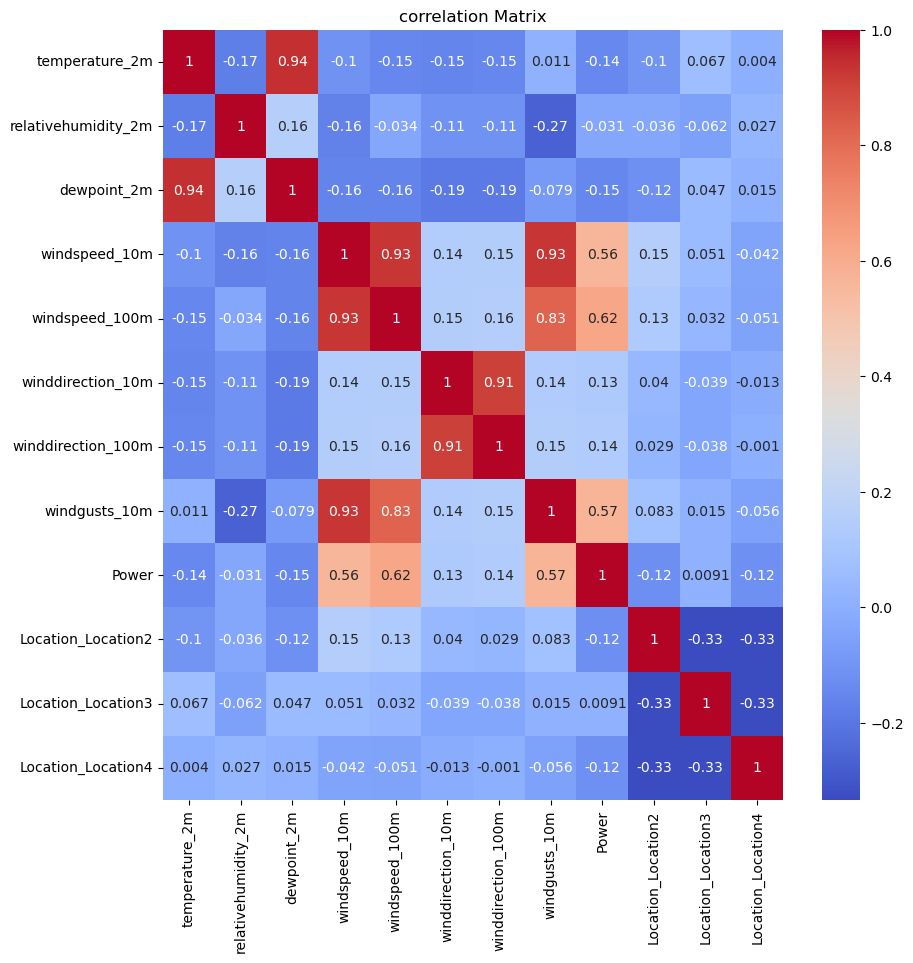

In [24]:
correleation = merged_data[numerical_columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot = True, cmap='coolwarm' )
plt.title("correlation Matrix")
plt.show()